# Triangular lattice

## one triangle

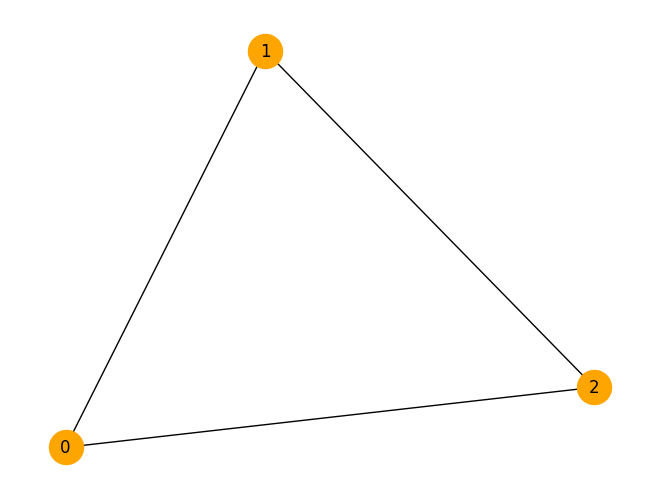

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])  # Triangle

nx.draw(G, with_labels=True, node_color='orange', node_size=600)
plt.show()


### Triangular Mesh Grid Example (with diagonal connections)

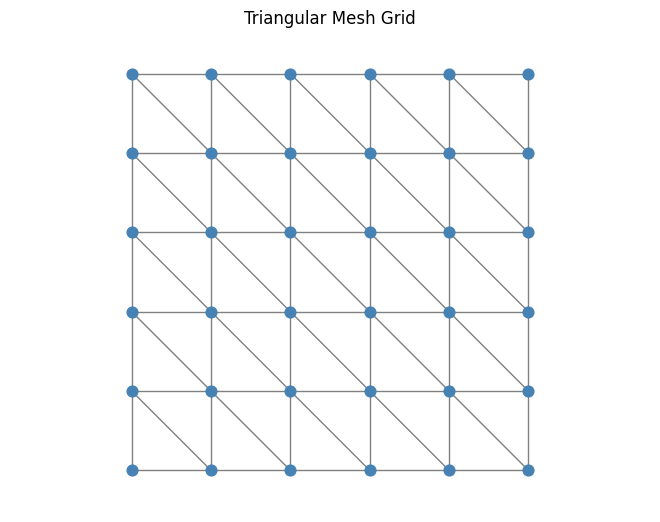

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def triangular_mesh(m, n):
    G = nx.Graph()
    for i in range(m):
        for j in range(n):
            G.add_node((i, j))
            if i > 0:
                G.add_edge((i, j), (i-1, j))         # vertical
            if j > 0:
                G.add_edge((i, j), (i, j-1))         # horizontal
            if i > 0 and j > 0:
                G.add_edge((i, j), (i-1, j-1))       # diagonal for triangle

    return G

# Create a triangular mesh of size 6x6
G = triangular_mesh(6, 6)

# Define node positions for a nice layout
pos = {(i, j): (j, -i) for i, j in G.nodes()}  # (x=j, y=-i) so (0,0) is top-left
nx.draw(G, pos, with_labels=False, node_size=60, node_color='steelblue', edge_color='gray')
plt.axis('equal')
plt.title("Triangular Mesh Grid")
plt.show()


# Triangular Lattice Coordinate

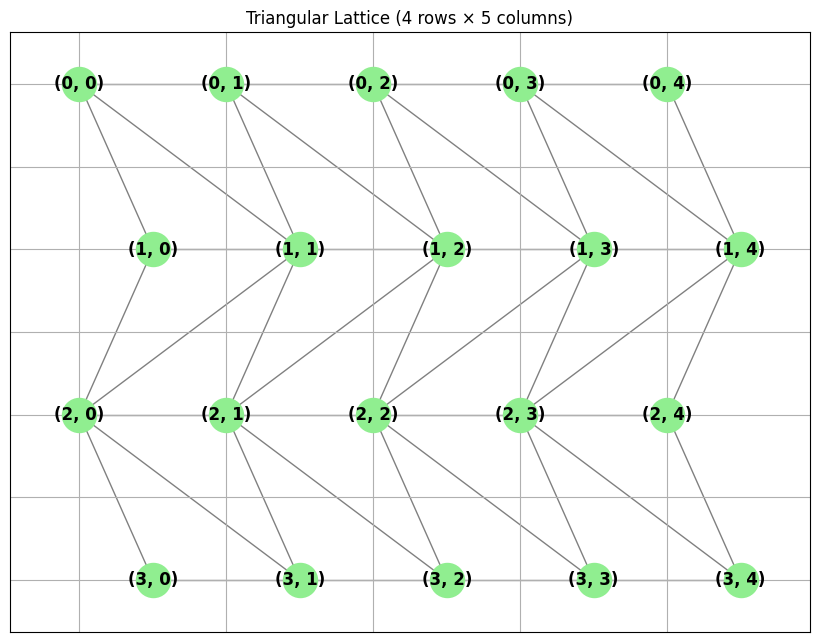

Node positions:
Node (0, 0): Position (0.0, 0)
Node (0, 1): Position (1.0, 0)
Node (1, 0): Position (0.5, -1)
Node (1, 1): Position (1.5, -1)
Node (0, 2): Position (2.0, 0)
Node (1, 2): Position (2.5, -1)
Node (0, 3): Position (3.0, 0)
Node (1, 3): Position (3.5, -1)
Node (0, 4): Position (4.0, 0)
Node (1, 4): Position (4.5, -1)
Node (2, 0): Position (0.0, -2)
Node (2, 1): Position (1.0, -2)
Node (2, 2): Position (2.0, -2)
Node (2, 3): Position (3.0, -2)
Node (2, 4): Position (4.0, -2)
Node (3, 0): Position (0.5, -3)
Node (3, 1): Position (1.5, -3)
Node (3, 2): Position (2.5, -3)
Node (3, 3): Position (3.5, -3)
Node (3, 4): Position (4.5, -3)


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
rows = 4    # number of rows
cols = 5    # number of columns

# Create empty graph
G = nx.Graph()

# Build triangular lattice manually
for i in range(rows):
    for j in range(cols):
        G.add_node((i, j))
        
        # Connect to right neighbor
        if j + 1 < cols:
            G.add_edge((i, j), (i, j+1))
        
        # Connect to bottom neighbor
        if i + 1 < rows:
            G.add_edge((i, j), (i+1, j))
        
        # Connect diagonally depending on row parity
        if i + 1 < rows:
            if (i % 2 == 0):
                if j + 1 < cols:
                    G.add_edge((i, j), (i+1, j+1))  # even rows -> down-right
            else:
                if j - 1 >= 0:
                    G.add_edge((i, j), (i+1, j-1))  # odd rows -> down-left

# Create position dictionary
pos = {}
for i, j in G.nodes():
    x = j + 0.5 * (i % 2)  # shift alternate rows
    y = -i
    pos[(i, j)] = (x, y)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=600, edge_color='gray', font_weight='bold')
plt.title("Triangular Lattice ({} rows × {} columns)".format(rows, cols))
plt.axis('on')
plt.grid(True)
plt.show()

# Print position coordinates
print("Node positions:")
for node, coord in pos.items():
    print(f"Node {node}: Position {coord}")


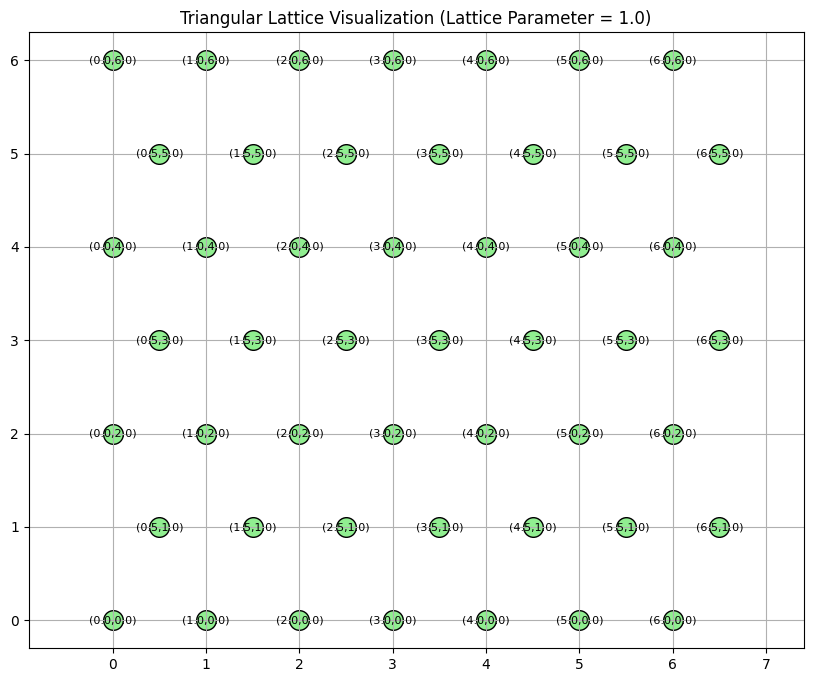

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the triangular lattice
rows = 7        # number of rows
cols = 7        # number of columns
lattice_param = 1.0  # lattice parameter (distance between adjacent atoms)

# Total number of nodes
N = rows * cols

# Arrays to store coordinates
coordinates = np.zeros((N, 2), dtype=float)  # store (x, y) for each node

# Generate triangular lattice
for i in range(rows):
    for j in range(cols):
        n = i * cols + j
        
        # Store node coordinates (in terms of x, y) for visualization
        x = j * lattice_param + 0.5 * (i % 2) * lattice_param  # stagger odd rows
        y = i * lattice_param  # shift y to make sure it's non-negative
        coordinates[n] = [x, y]

# Plotting the triangular lattice
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='lightgreen', s=200, edgecolor='black')

# Annotate coordinates on the plot
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, f'({x:.1f},{y:.1f})', fontsize=8, ha='center', va='center')

plt.title(f"Triangular Lattice Visualization (Lattice Parameter = {lattice_param})")
plt.grid(True)
plt.axis('equal')
plt.show()

# Print coordinates array
#print("Coordinates array:")
#print(coordinates)


# correct Trigonal lattice

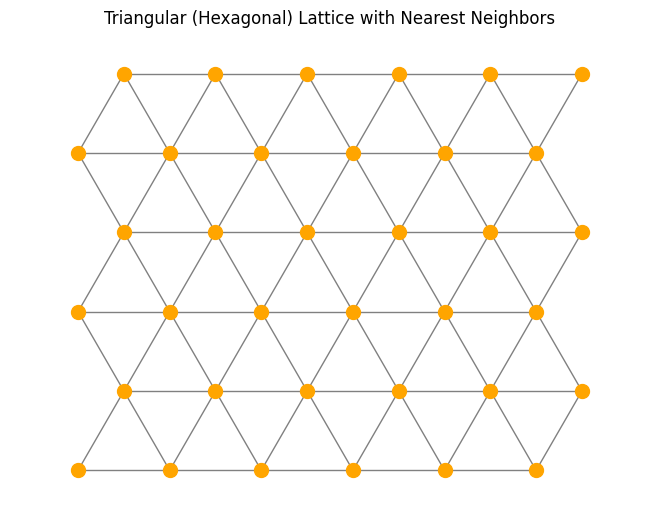

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parameters
a = 1.0   # lattice constant (spacing)
rows, cols = 6, 6  # number of rows and columns

G = nx.Graph()

# Create nodes with positions
for i in range(rows):
    for j in range(cols):
        x = j * a + (a/2 if i % 2 else 0)   # shift odd rows by a/2
        y = i * (np.sqrt(3)/2) * a
        G.add_node((i, j), pos=(x, y))

# Connect only nearest neighbors (6 per node where applicable)
for i in range(rows):
    for j in range(cols):
        # Current node position
        current = (i, j)

        # Neighboring nodes (6 directions)
        neighbors = [
            (i, j-1),     # left
            (i, j+1),     # right
            (i-1, j),     # upper (same column)
            (i+1, j),     # lower (same column)
        ]

        # Diagonal neighbors depend on row parity
        if i % 2 == 0:
            neighbors += [(i-1, j-1), (i+1, j-1)]   # upper-left & lower-left for even rows
        else:
            neighbors += [(i-1, j+1), (i+1, j+1)]   # upper-right & lower-right for odd rows

        # Add edges only if neighbor exists within bounds
        for ni, nj in neighbors:
            if 0 <= ni < rows and 0 <= nj < cols:
                G.add_edge(current, (ni, nj))

# Get positions for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw lattice
nx.draw(G, pos, node_size=100, node_color='orange', edge_color='gray')
plt.title("Triangular (Hexagonal) Lattice with Nearest Neighbors")
plt.axis('equal')
plt.show()


### Triangular (Hexagonal) Lattice with Nearest Neighbors and Next Nearest Neighbors

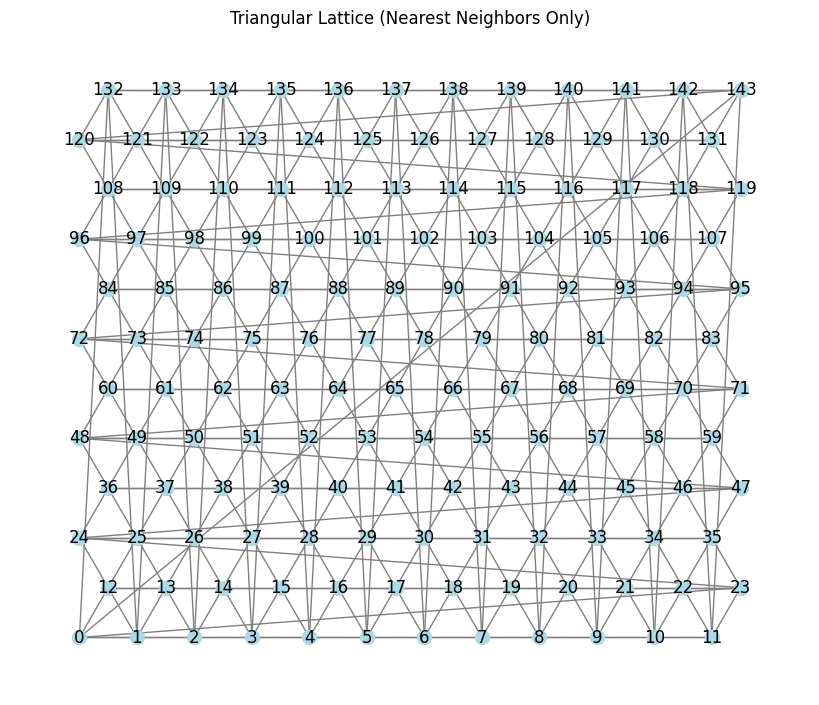


=== Nearest Neighbors ===
Node 0 at (0.0, 0.0):
   Nearest Neighbor: Node 1 at (1.0, 0.0)
   Nearest Neighbor: Node 11 at (11.0, 0.0)
   Nearest Neighbor: Node 12 at (0.5, 0.8660254037844386)
   Nearest Neighbor: Node 23 at (11.5, 0.8660254037844386)
   Nearest Neighbor: Node 132 at (0.5, 9.526279441628825)
   Nearest Neighbor: Node 143 at (11.5, 9.526279441628825)
Total Nearest Neighbors: 6

Node 1 at (1.0, 0.0):
   Nearest Neighbor: Node 0 at (0.0, 0.0)
   Nearest Neighbor: Node 2 at (2.0, 0.0)
   Nearest Neighbor: Node 12 at (0.5, 0.8660254037844386)
   Nearest Neighbor: Node 13 at (1.5, 0.8660254037844386)
   Nearest Neighbor: Node 132 at (0.5, 9.526279441628825)
   Nearest Neighbor: Node 133 at (1.5, 9.526279441628825)
Total Nearest Neighbors: 6

Node 2 at (2.0, 0.0):
   Nearest Neighbor: Node 1 at (1.0, 0.0)
   Nearest Neighbor: Node 3 at (3.0, 0.0)
   Nearest Neighbor: Node 13 at (1.5, 0.8660254037844386)
   Nearest Neighbor: Node 14 at (2.5, 0.8660254037844386)
   Nearest Neig

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
rows, cols = 12, 12
a = 1.0  # lattice spacing
lx = cols * a
ly = rows * np.sqrt(3)/2 * a

# Generate triangular lattice coordinates
positions = []
for i in range(rows):
    for j in range(cols):
        x = j * a + (i % 2) * (a/2)
        y = i * (np.sqrt(3)/2) * a
        positions.append((x, y))

# Build graph
G = nx.Graph()
for idx, pos in enumerate(positions):
    G.add_node(idx, pos=pos)

# Periodic Distance Function
def periodic_distance(p1, p2):
    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]
    # Apply minimum image convention
    dx -= lx * np.round(dx / lx)
    dy -= ly * np.round(dy / ly)
    return np.hypot(dx, dy)

# Build nearest neighbor edges
threshold_nearest = 1.1 * a
threshold_next_nearest = 1.75 * a  # ~sqrt(3)

nearest_neighbors = {}
next_nearest_neighbors = {}

for i in range(len(positions)):
    nearest_neighbors[i] = []
    next_nearest_neighbors[i] = []
    for j in range(len(positions)):
        if i == j:
            continue
        dist = periodic_distance(positions[i], positions[j])
        if dist < threshold_nearest:
            G.add_edge(i, j)  # Only connect nearest neighbor
            nearest_neighbors[i].append(j)
        elif dist < threshold_next_nearest:
            next_nearest_neighbors[i].append(j)

# Plot graph
plt.figure(figsize=(8, 8))
pos_dict = {i: positions[i] for i in range(len(positions))}
nx.draw(G, pos=pos_dict, with_labels=True, node_size=100, node_color="lightblue", edge_color="gray")
plt.title("Triangular Lattice (Nearest Neighbors Only)")
plt.gca().set_aspect('equal')
plt.show()

# Print Nearest and Next-Nearest Neighbors for first few particles
print("\n=== Nearest Neighbors ===")
for i in range(5):
    print(f"Node {i} at {positions[i]}:")
    for j in nearest_neighbors[i]:
        print(f"   Nearest Neighbor: Node {j} at {positions[j]}")
    print(f"Total Nearest Neighbors: {len(nearest_neighbors[i])}\n")

print("\n=== Next-Nearest Neighbors ===")
for i in range(5):
    print(f"Node {i} at {positions[i]}:")
    for j in next_nearest_neighbors[i]:
        print(f"   Next-Nearest Neighbor: Node {j} at {positions[j]}")
    print(f"Total Next-Nearest Neighbors: {len(next_nearest_neighbors[i])}\n")
